In [4]:
# Jupyter Notebook for the Data Science Project

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

## Importing datasets

In [5]:
# Create Dataframes
## mobilitytrendsUS
df_mobUS = pd.read_csv('mobilitytrendsUS.csv')
df_mobUS = df_mobUS.drop(columns=['geo_type', 'region'])
df_mobUS.head()

,transportation_type,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,2020/1/21,...,2020/4/15,2020/4/16,2020/4/17,2020/4/18,2020/4/19,2020/4/20,2020/4/21,2020/4/22,2020/4/23,2020/4/24
0,driving,100,102.97,105.19,108.48,125.51,115.04,90.91,102.57,103.07,...,63.03,64.11,70.71,65.07,52.71,65.15,65.0,66.49,68.00,76.68
1,transit,100,97.77,98.84,99.04,108.03,97.41,85.40,92.39,100.27,...,24.23,24.06,24.89,22.89,22.11,26.13,25.1,25.09,25.08,25.99
2,walking,100,99.59,101.87,100.60,121.36,132.38,100.10,94.79,94.84,...,50.37,50.64,54.85,52.49,45.86,53.87,51.9,52.86,52.92,58.89


In [6]:
## mobilitytrendsUScities
df_mobUScty = pd.read_csv('mobilitytrendsUScities.csv')
df_mobUScty = df_mobUScty.drop(columns='geo_type')
df_mobUScty.head()

,region,transportation_type,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,...,2020/4/15,2020/4/16,2020/4/17,2020/4/18,2020/4/19,2020/4/20,2020/4/21,2020/4/22,2020/4/23,2020/4/24
0,Baltimore,driving,100,105.60,108.94,109.34,125.40,89.48,82.95,93.03,...,67.35,68.11,78.93,70.45,59.35,69.60,65.67,71.43,69.95,77.55
1,Baltimore,transit,100,99.96,105.05,97.79,100.00,71.71,68.96,84.98,...,44.05,41.14,42.86,36.18,38.09,46.14,41.58,44.12,40.18,42.81
2,Baltimore,walking,100,104.72,123.02,125.76,142.25,114.08,91.54,89.69,...,68.13,65.61,75.96,70.98,65.60,71.24,65.80,72.16,66.27,74.12
3,Boston,driving,100,102.84,108.22,109.17,124.38,102.86,84.10,96.18,...,46.97,46.27,53.20,41.13,45.87,45.71,44.37,47.50,52.44,50.90
4,Boston,transit,100,100.59,105.25,104.49,111.98,109.27,95.06,101.35,...,19.35,16.55,17.61,16.55,17.71,18.30,18.15,17.89,18.50,16.91


In [7]:
## US_daily_confirmed_cases
df_daily_cases = pd.read_csv('US_daily_confirmed_cases.csv')
df_daily_cases = df_daily_cases.drop(columns=['Entity', 'Code'])
df_daily_cases.head()

,Date,Daily confirmed cases (cases)
0,13-Jan-20,0
1,14-Jan-20,0
2,15-Jan-20,0
3,16-Jan-20,0
4,17-Jan-20,0


In [8]:
## US_daily_deaths
df_daily_deaths = pd.read_csv('US_daily_deaths.csv')
df_daily_deaths = df_daily_deaths.drop(columns=['Entity', 'Code'])
df_daily_deaths.head()

,Date,Daily confirmed deaths (deaths)
0,13-Jan-20,0
1,14-Jan-20,0
2,15-Jan-20,0
3,16-Jan-20,0
4,17-Jan-20,0


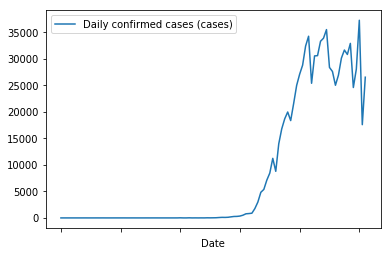

In [9]:
# Visualization (US daily cases)
df_daily_cases.plot(x='Date')

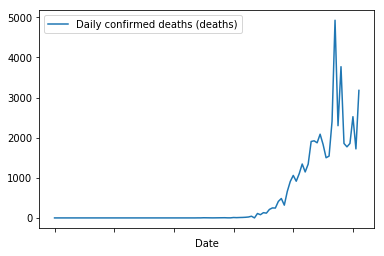

In [10]:
# Visualization (US daily deaths)
df_daily_deaths.plot(x='Date')

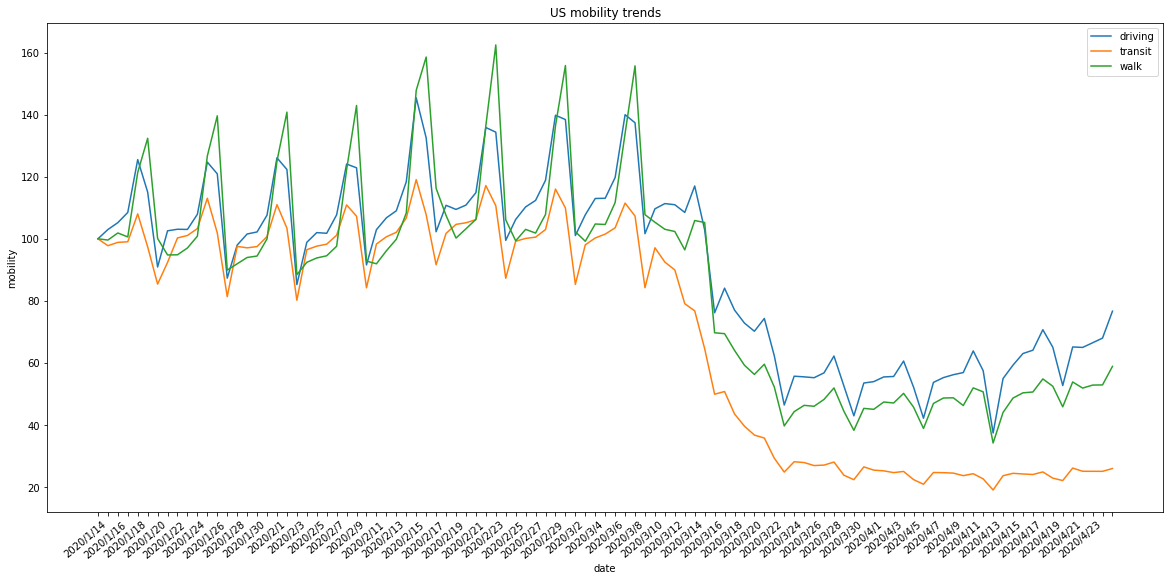

In [11]:
# Visualization (US mobility trends)
# df_mobUS
cols = df_mobUS.columns[1:]

drive = df_mobUS.values[0]
transit = df_mobUS.values[1]
walk = df_mobUS.values[2]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, drive[1:], label="driving");
plt.plot(cols,transit[1:], label="transit");
plt.plot(cols,walk[1:], label="walk");

plt.xlabel('date')
plt.ylabel('mobility')
plt.title('US mobility trends')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

Above we can see the mobility trends we are monitoring and how they change as time progresses. From this data, we notice that a significant dip in mobility occurs in early March. This dip in mobility in early March correlate with the first stay at home orders being given out and a general fear and understanding by the public of the pandemic that is occuring.
We also notice that it seems all types of transportation are not affected the same. If we look carefully at the data, we notice that walking was once the preferred method of transportation, but after early March, we can see that people are starting to forego walking and transport by car becomes more prevalent.

In [12]:
# seperating data into types of city, type of transit

# each city's type of transit
driveList = []
transitList = []
walkList = []

# each city
allCities = []
cityList = []

ttype = 1
for row in df_mobUScty.values:
    # seperating vals by transit type, city name
    if ttype % 3 == 1:
        cityList.append(row)
        
        driveList.append(row)
        
        ttype += 1
    elif ttype % 3 == 2: 
        cityList.append(row)
        
        transitList.append(row)
        
        ttype += 1
    elif ttype % 3 == 0:
        cityList.append(row)
        allCities.append(cityList)
        cityList = []
        
        walkList.append(row)
        
        ttype = 1
    else:
        raise Exception("dataError")

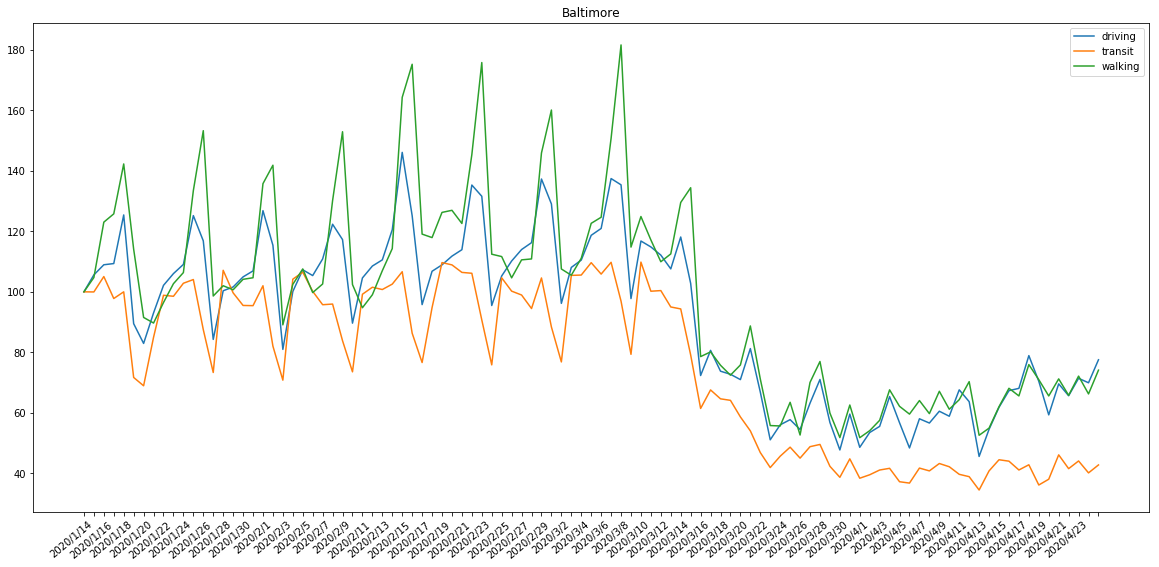

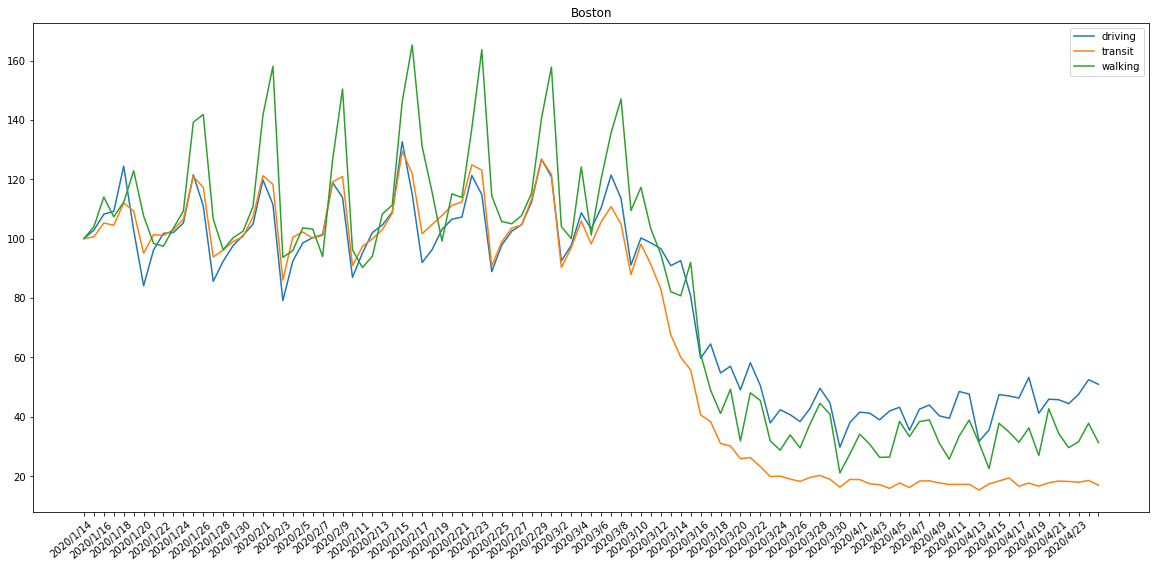

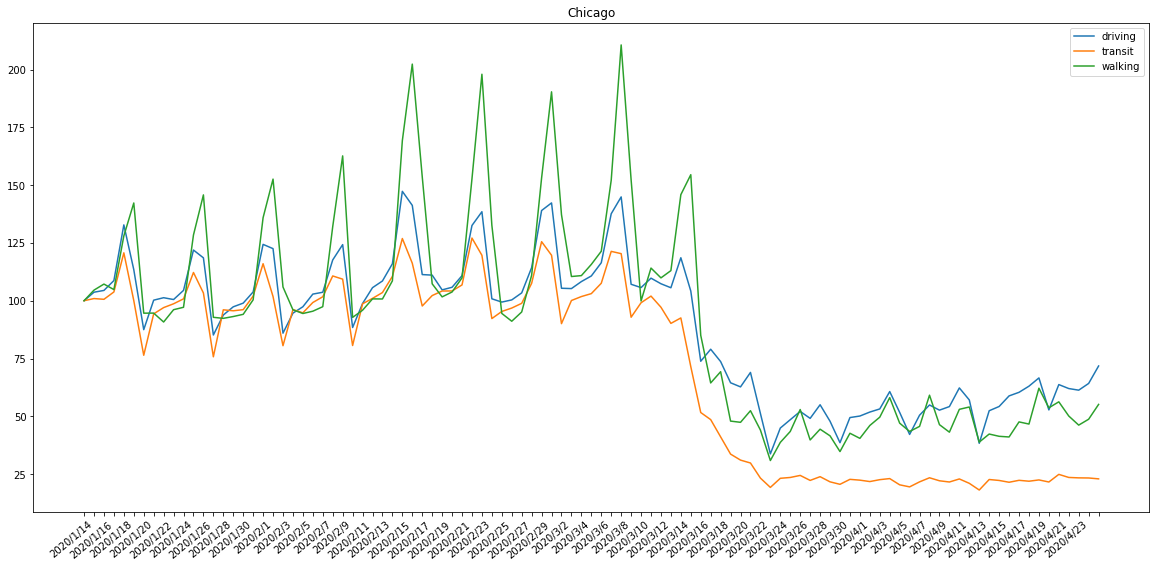

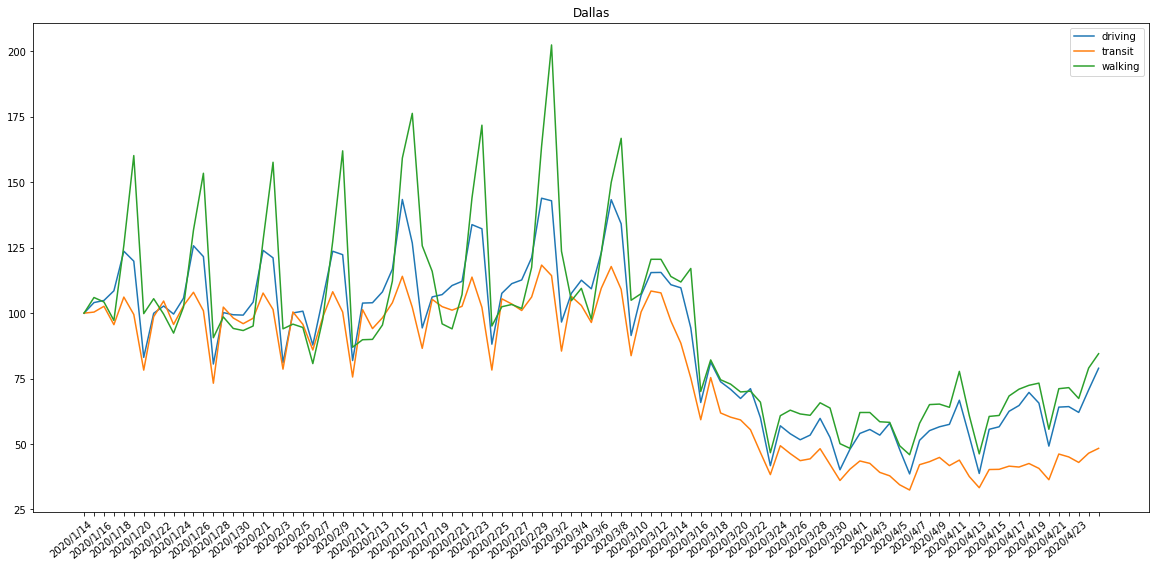

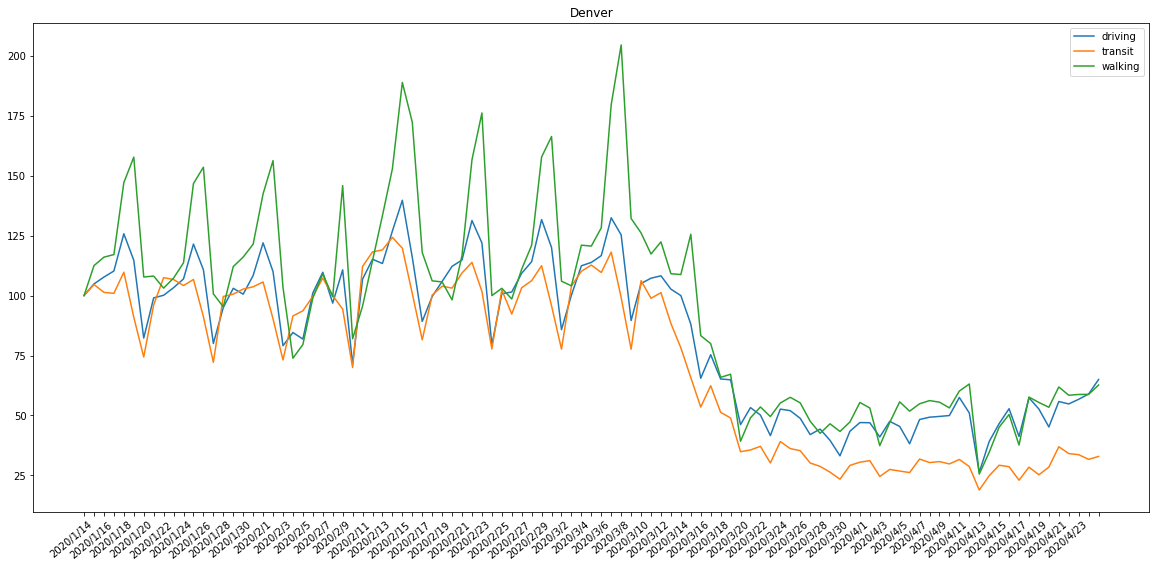

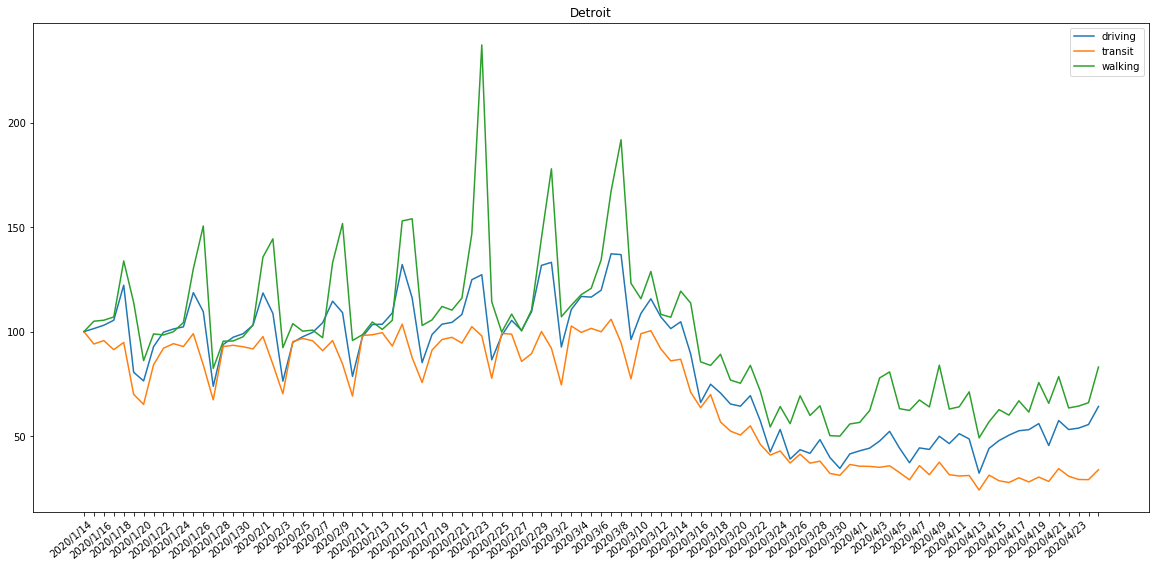

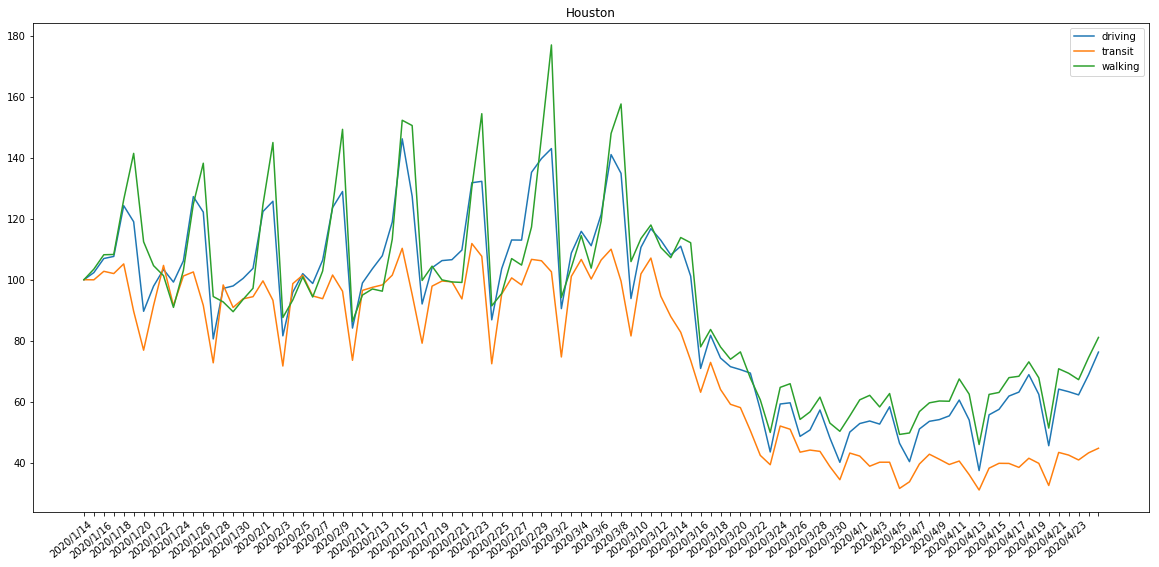

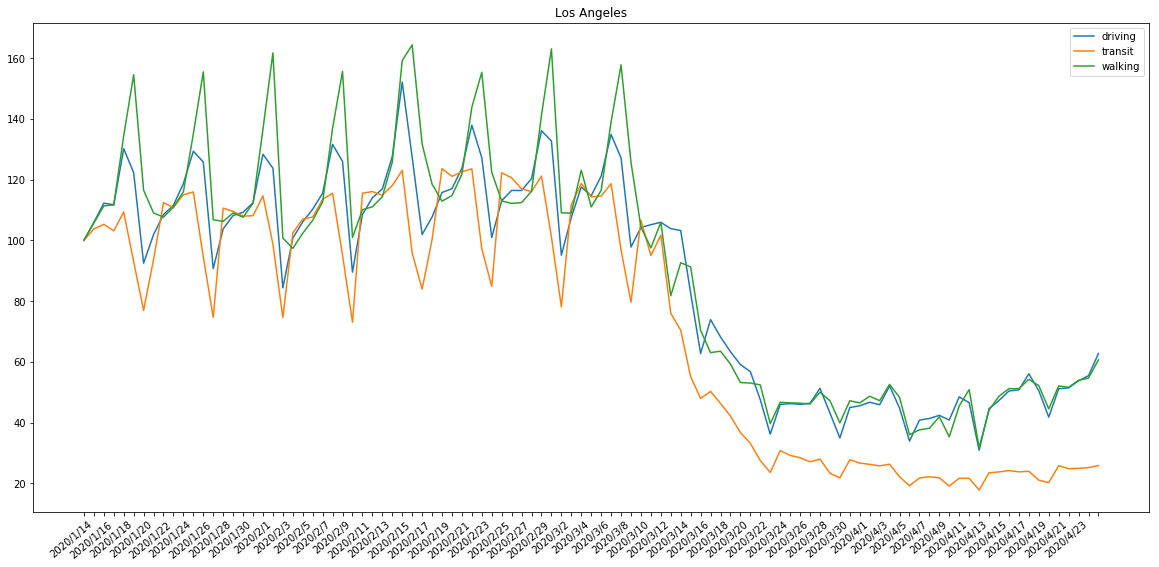

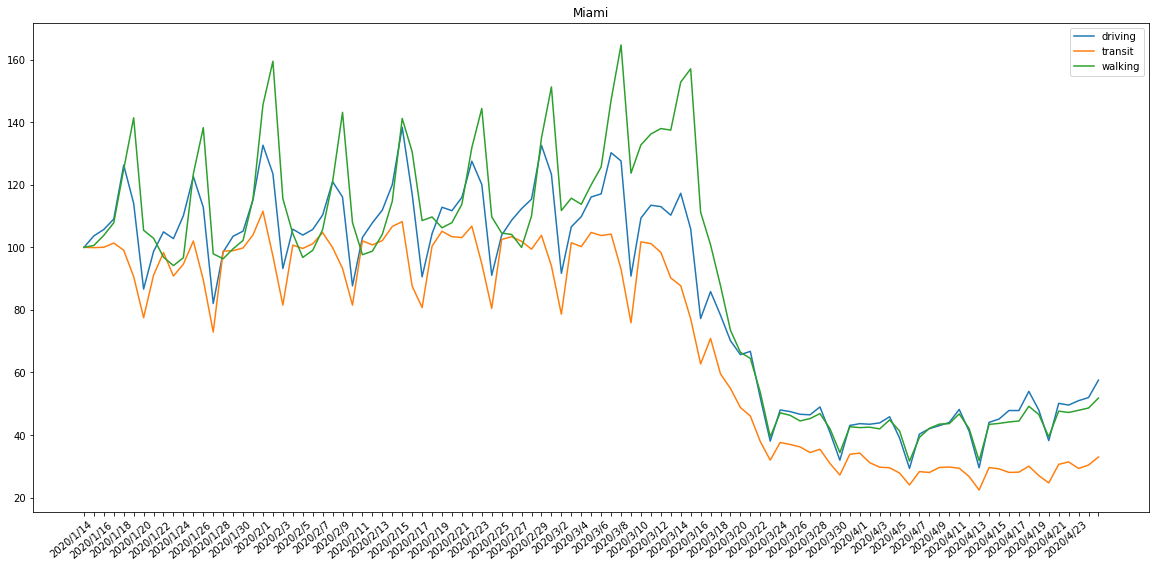

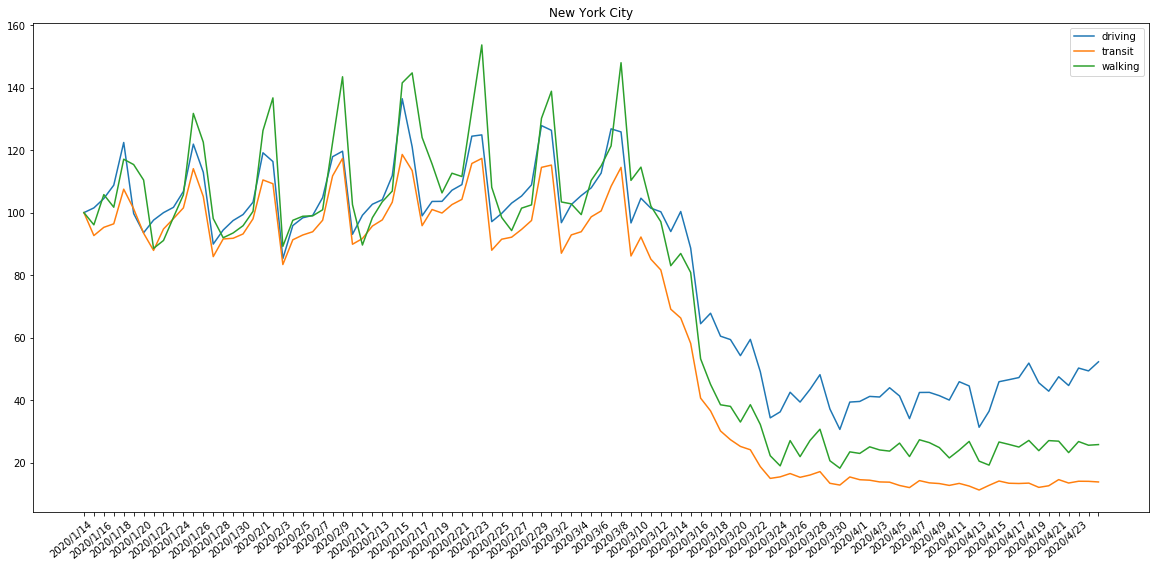

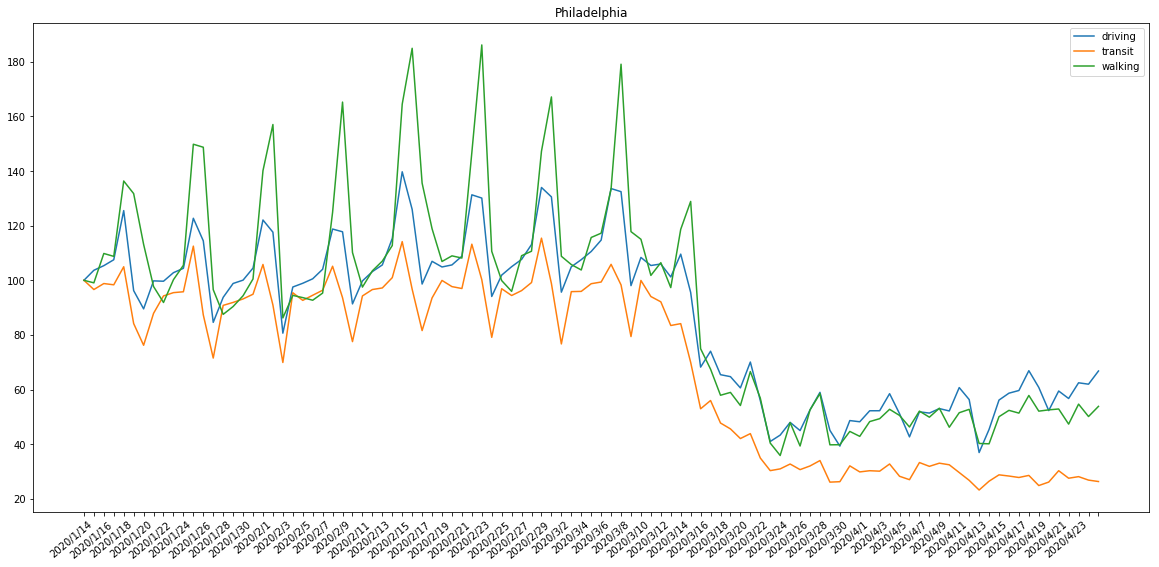

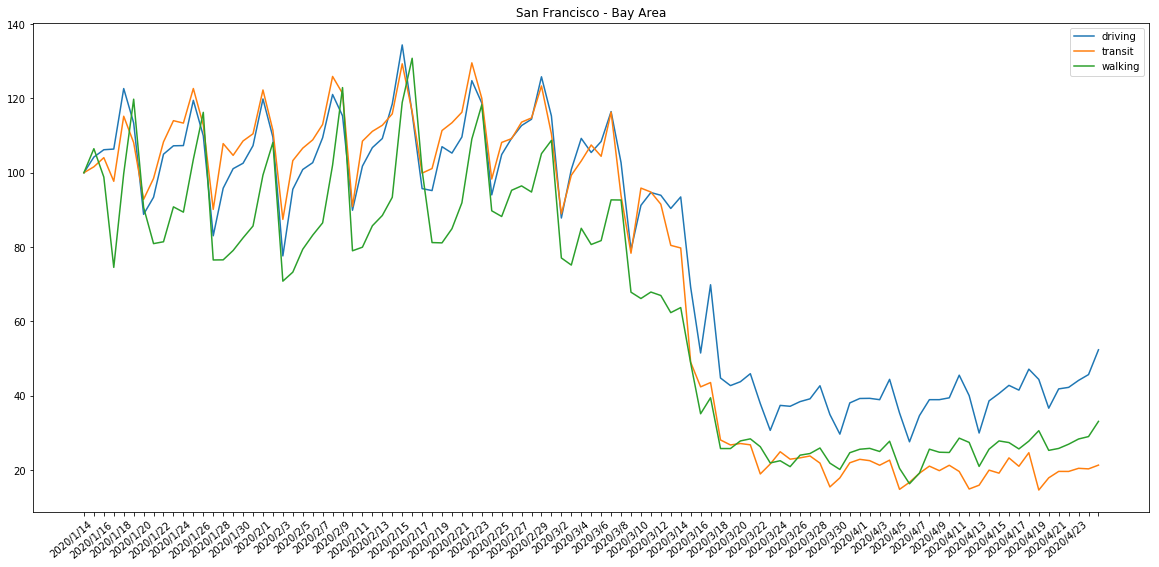

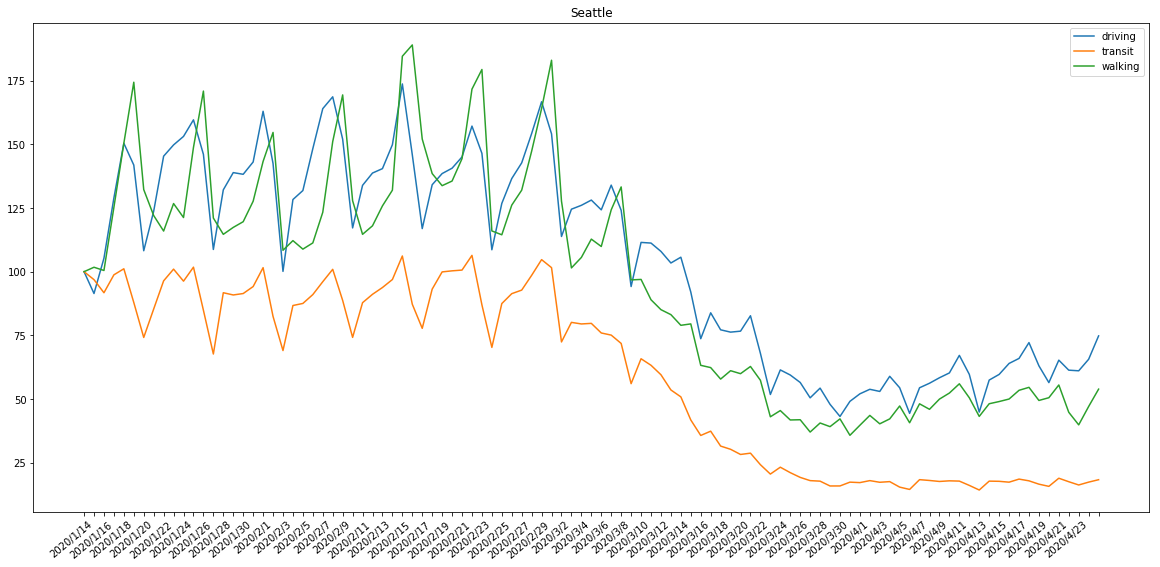

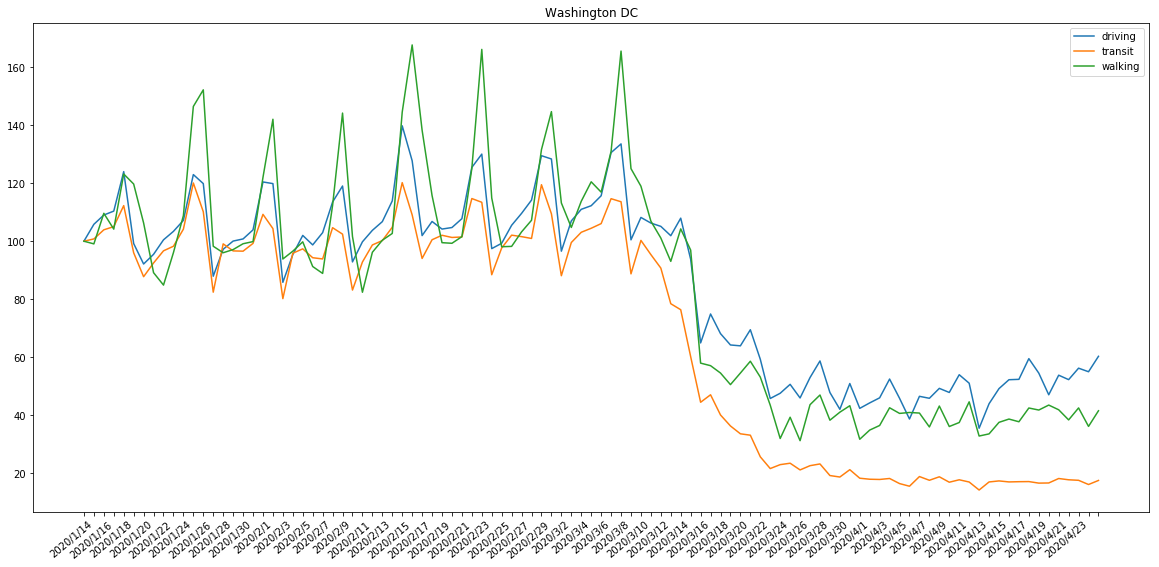

In [13]:
# Visualization (each city types of transit)
# df_mobUScty

dates = df_mobUScty.columns[2:]

for citygroup in allCities:
    cityName = ""
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xticks(np.arange(len(dates))) 
    ax.set_xticklabels(cols)
    for city in citygroup:
        cityName = city[0]
        transtype = city[1]
        data = city[2:]
        
        plt.plot(dates, data, label=transtype)
        
    plt.title(cityName)
    plt.legend()
    
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation=40)
    
    spacing = 2
    for label in ax.xaxis.get_ticklabels()[::spacing]:
        label.set_visible(False)
    
    plt.show()
        



Above we can see the affects COVID-19 has had on individual cities rather than the US population as a whole. For the most part, every state has a similar timeline and reaction to COVID-19.

Looking closely, we notice that before early March, most areas generally saw peak movement occur on weekends and then dip back down to regular levels during the week. However, as mid March and later rolls around, we notice that these peaks in movement around the weekends are virtually gone. This makes sense as mid-March and later marked the shutdown of non-essential public activities and therefore people then have less of a reason to travel and more of a reason to stay home. This non-essential shutdown includes going bars and other highly social activities that people normally take place in which is why we no longer see peaks during the weekends.

Out of all the locations graphed above, we can see that the most impacted area was NYC. By carefully examining our data, we can see that NYC towards the most recent months has dropped as low as 10% of standard mobility since the first recorded day in our dataset. No other area we have collected data for has seen mobility drop this far.

Looking at this data and looking especially at the dates in which mobility drops off, we can make some interesting assumptions about which areas are affected the most and which areas are dealing with COVID-19 the best. We will explore some of these assumptions later on.

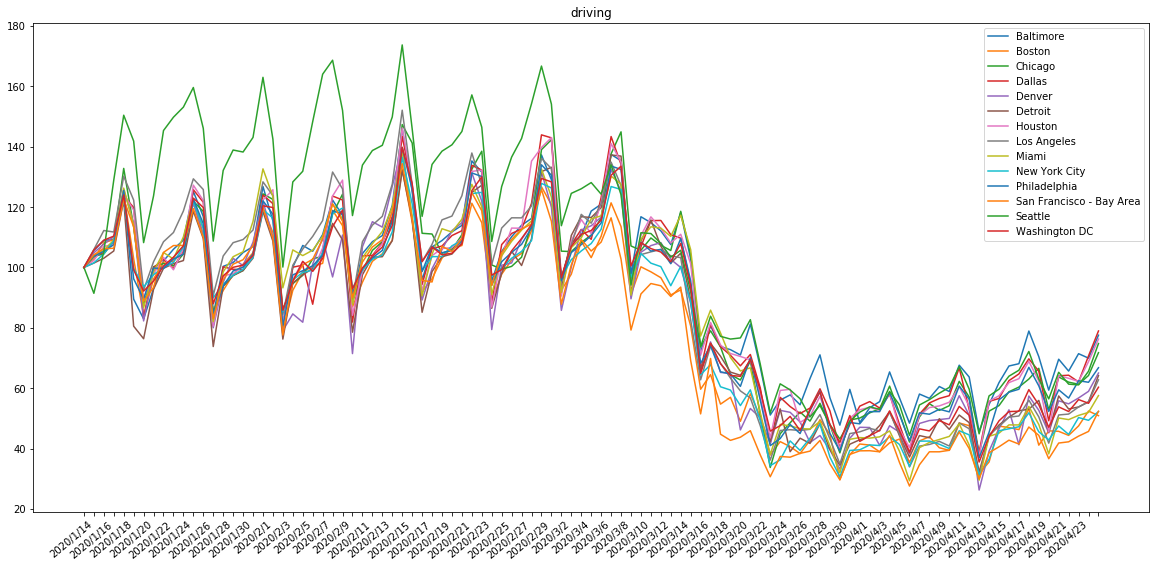

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in driveList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()
    

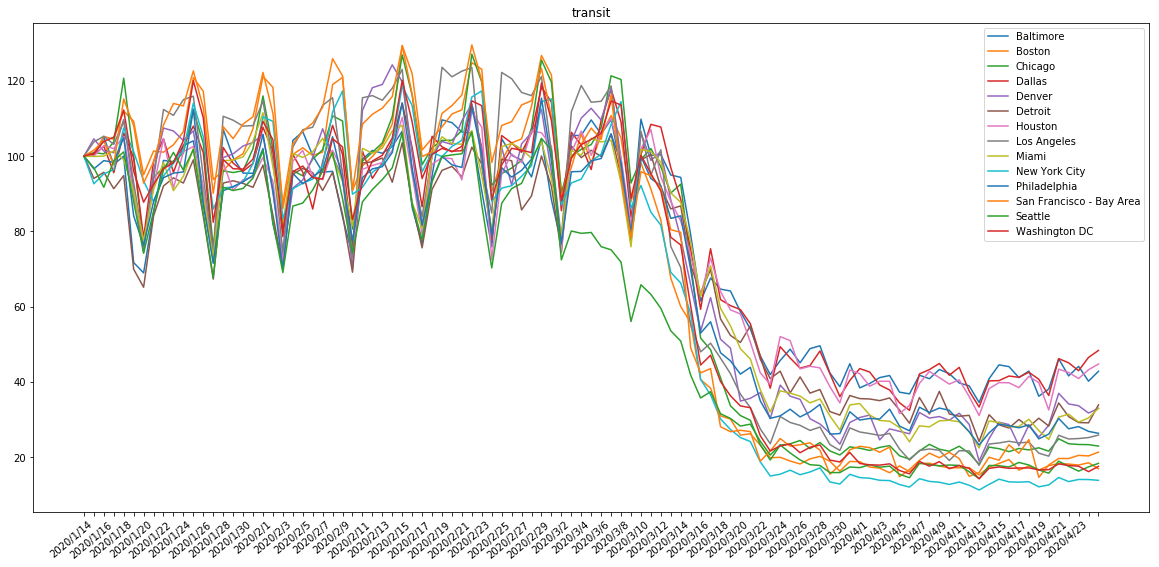

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in transitList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()
    

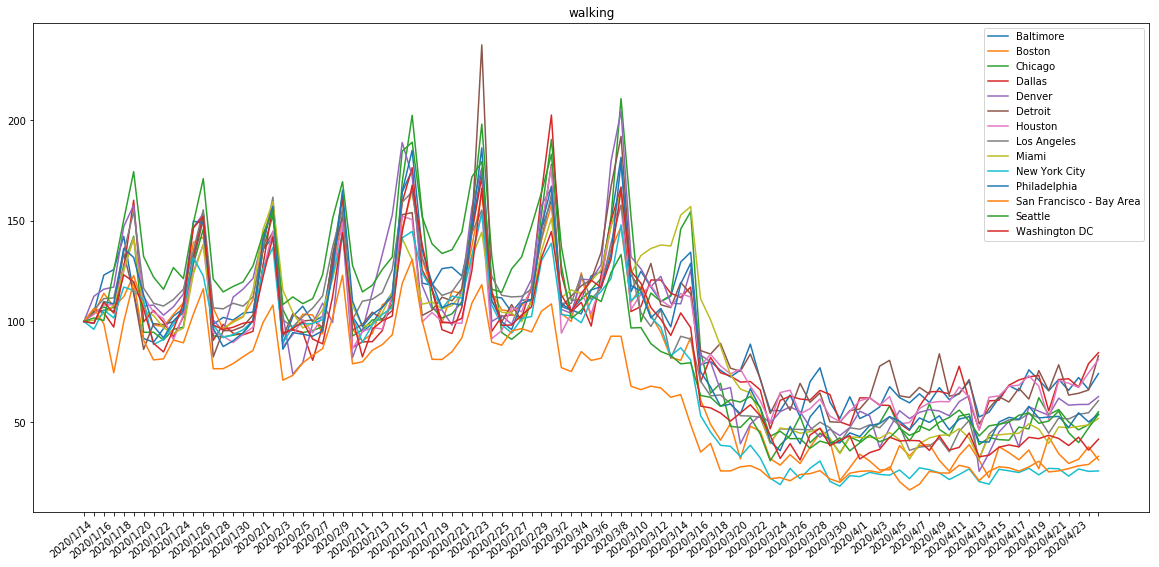

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in walkList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()
    

Looking at the three above graphs, we can see how COVID-19 has affected all of these areas and we can also compare pre and post COVID-19 activity and even get a sense of what the reaction to the virus was.

If we take a look at just the transit mobility, we can gain a sense of which areas public transportation systems are most depended on. Looking at the data, we can see that NYC public transport starts off one of the most highly used methods of transport for NYC respectively, but after mid-March we can see it drops to one of the lowest use rates. We can also see that for a city like DC, public transportation might not be that integral as we can see use rates still remain relatively high despite other forms of transportation taking significant dips. Another interesting piece of the transit graph is Seattle's reaction to COVID-19. As we know, Seattle was one of the first cities in the US to get hit by COVID-19 and it was certainly one of the areas that was hit the hardest. Perhaps due to this, we can see Seattle's public transport mobility use rate drop faster and sooner than every other area measured.

There are a lot of key insights we can take away from these graphs but it is important to look at other views of our data so we can learn even more about how COVID-19 has affected areas of the US.

# WEEK 4


In [17]:
df_dailyCasesCities = pd.read_csv('U.S.cities_daily_cases.csv')
df_dailyCasesCities = df_dailyCasesCities.drop(columns=['Unnamed: 110', 'Unnamed: 111'])
df_dailyCasesCities

,region,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,2020/1/21,...,2020/4/21,2020/4/22,2020/4/23,2020/4/24,2020/4/25,2020/4/26,2020/4/27,2020/4/28,2020/4/29,2020/4/30
0,Baltimore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31,60,70,56,63,75,67,44,37,54
1,Boston (Suffolk),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,355,391,679,985,494,325,340,257,399,351
2,New York City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2980,3394,2711,2336,1258,960,2129,2392,1843,673
3,Los Angeles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,877,796,978,914,664,312,642,498,387,213
4,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105,85,82,51,19,7,29,29,20,19


In [18]:
df_dailyDeathsCities = pd.read_csv('U.S.cities_daily_death.csv')
df_dailyDeathsCities = df_dailyDeathsCities.drop(columns=['Unnamed: 110', 'Unnamed: 111'])
df_dailyDeathsCities

,region,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,2020/1/21,...,2020/4/21,2020/4/22,2020/4/23,2020/4/24,2020/4/25,2020/4/26,2020/4/27,2020/4/28,2020/4/29,2020/4/30
0,Baltimore,0,0,0,0,0,0,0,0,0,...,9,2,4,1,5,3,3,2,9,4
1,Boston (Suffolk),0,0,0,0,0,0,0,0,0,...,22,33,28,26,19,33,24,21,35,20
2,New York City,0,0,0,0,0,0,0,0,0,...,264,268,268,233,187,183,164,115,77,41
3,Los Angeles,0,0,0,0,0,0,0,0,0,...,40,41,43,39,35,39,32,41,31,18


Above we have gathered data for the daily number of deaths and cases for select areas of the US.

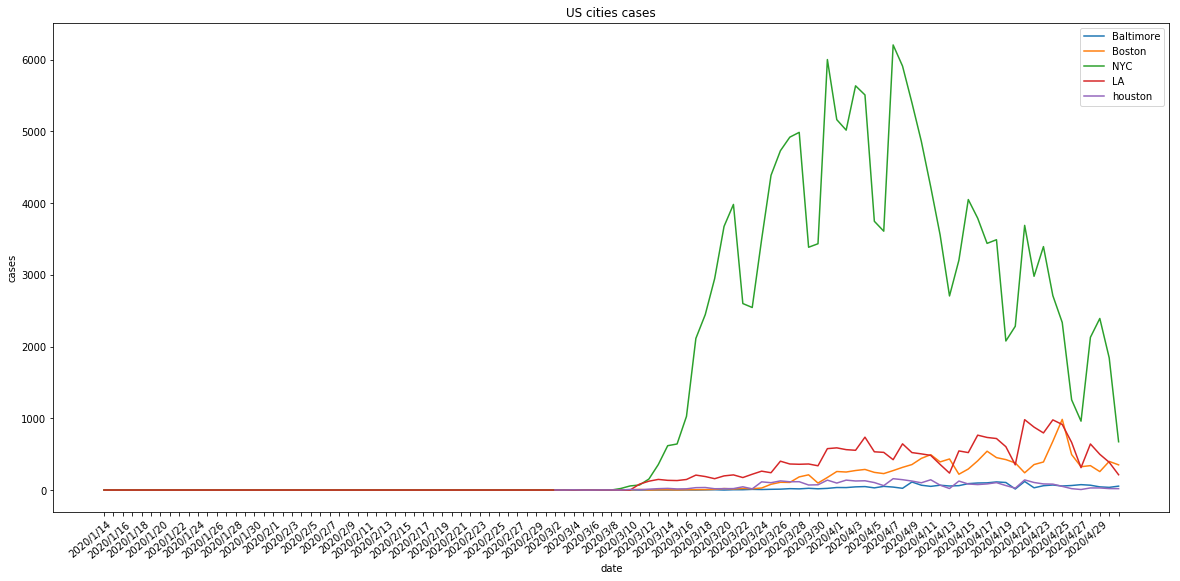

In [19]:
# Visualization (City cases)
# df_dailyCasesCities
cols = df_dailyCasesCities.columns[1:]

baltimore = df_dailyCasesCities.values[0]
boston = df_dailyCasesCities.values[1]
nyc = df_dailyCasesCities.values[2]
la = df_dailyCasesCities.values[3]
houston = df_dailyCasesCities.values[4]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, baltimore[1:], label="Baltimore");
plt.plot(cols, boston[1:], label="Boston");
plt.plot(cols, nyc[1:], label="NYC");
plt.plot(cols, la[1:], label="LA");
plt.plot(cols, houston[1:], label="houston");

plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cities cases')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

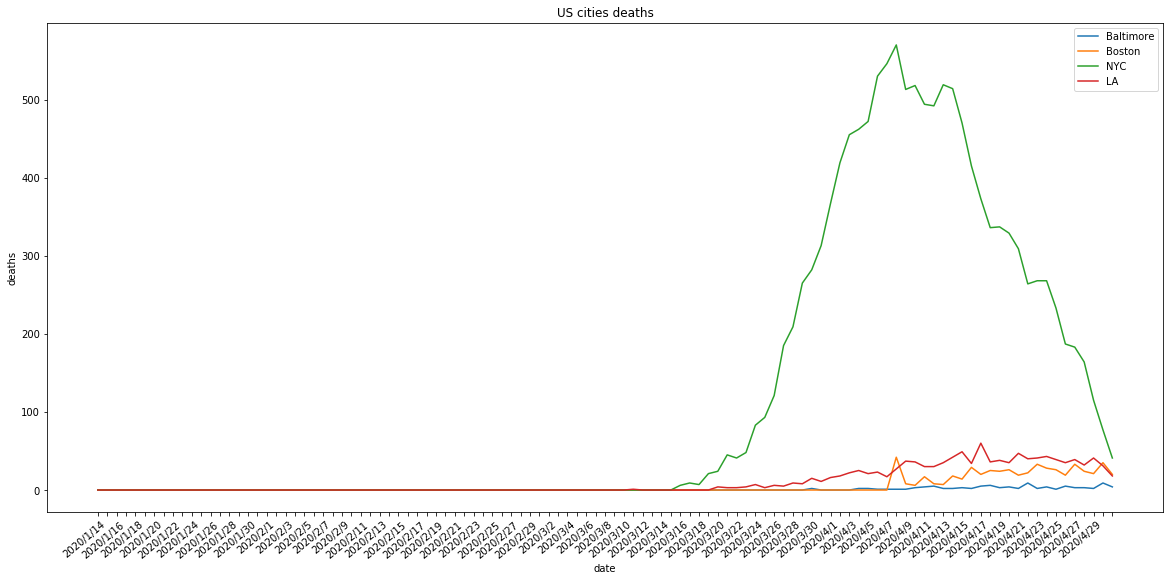

In [20]:
# Visualization (City deaths)
# df_dailyCasesCities
cols = df_dailyDeathsCities.columns[1:]

baltimore = df_dailyDeathsCities.values[0]
boston = df_dailyDeathsCities.values[1]
nyc = df_dailyDeathsCities.values[2]
la = df_dailyDeathsCities.values[3]
# houston = df_dailyDeathsCities.values[4]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, baltimore[1:], label="Baltimore");
plt.plot(cols, boston[1:], label="Boston");
plt.plot(cols, nyc[1:], label="NYC");
plt.plot(cols, la[1:], label="LA");
# plt.plot(cols, houston[1:], label="houston");

plt.xlabel('date')
plt.ylabel('deaths')
plt.title('US cities deaths')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

Above we can see how select cities stack up against each other in terms of number of cases reported per day and number of deaths per day. The initial idea while looking at the graph is that NYC is severely more affected than other areas. While this is certainly true, we should stop and think why.

The first thought is that NYC might just have the highest population and that is why it's cases and deaths per day are so much more extreme than other areas measured. While this is correct, it does not quite explain everything here. A quick google search shows us the NYC has around 8.4 million residents, while the second most affected area, LA, only has around 4 million people. While NYC has more than 2x the people LA does, it begs the question, how can NYC have more than 10x the daily cases and deaths of LA? To answer this question, we should look no further than the proximity at which people live in these 2 areas. According to google, NYC hosts 26,403 people per square mile, while LA hosts 6,999 per square mile. This means NYC residents are around 3x closer to potentially infected people than residents of LA. Also, knowing that the spread of COVID-19 and other pandemics are exponential, the reason why NYC is so much more affected than other areas like LA begins to become clear.

### Mobility and Cases analysis

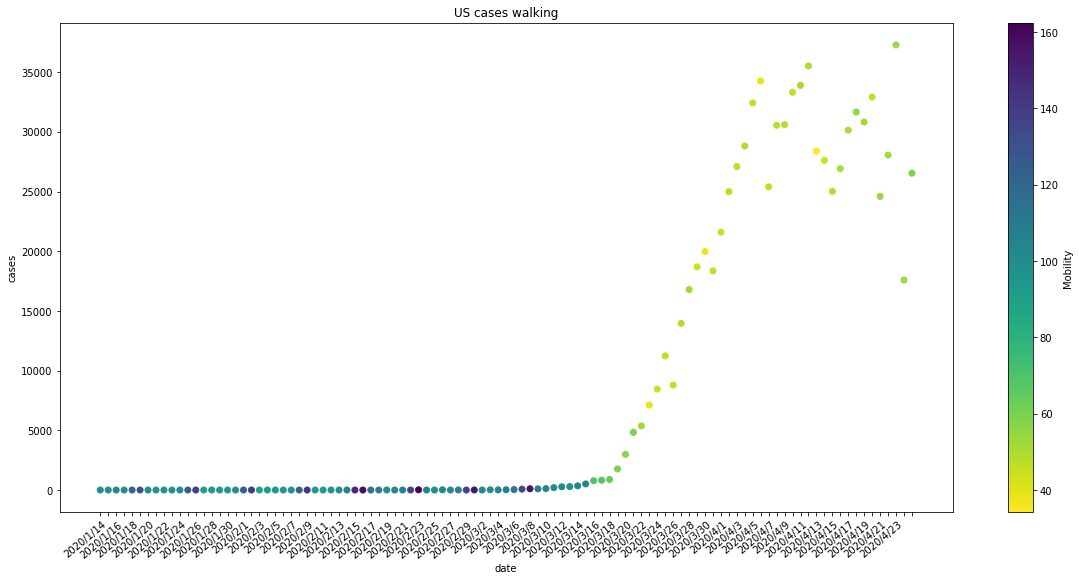

In [21]:
# visualizing mobility and number of cases
# walking
walking = df_mobUS.values[2][1:]
dates = df_mobUS.columns[1:]
daily_cases = df_daily_cases['Daily confirmed cases (cases)']

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)

plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases walking')

plt.scatter(dates, daily_cases, c=walking, cmap='viridis_r')
plt.colorbar().set_label('Mobility')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()
# # df_cases_and_mobilityUS 

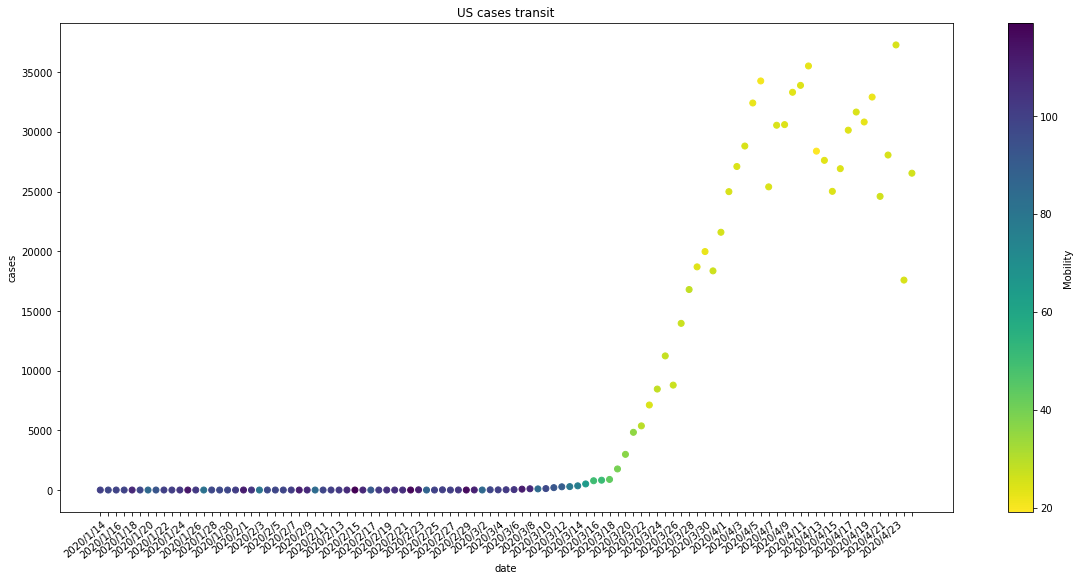

In [22]:
# visualizing mobility and number of cases
# transit
transit = df_mobUS.values[1][1:]
dates = df_mobUS.columns[1:]


daily_cases = df_daily_cases['Daily confirmed cases (cases)']
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases transit')

plt.scatter(dates, daily_cases, c=transit, cmap='viridis_r')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()
# # df_cases_and_mobilityUS 

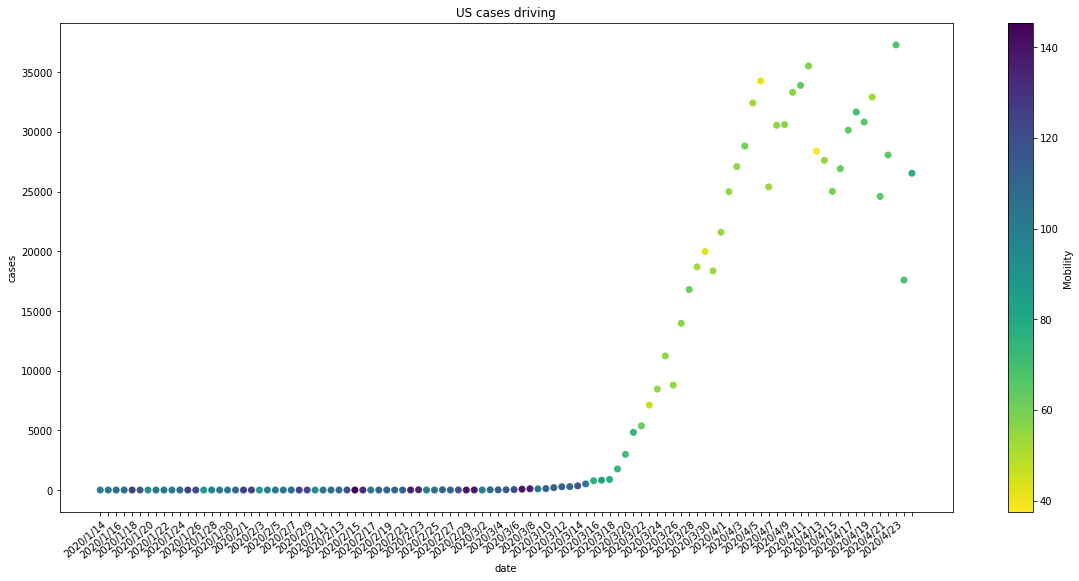

In [23]:
# visualizing mobility and number of cases
# driving
driving = df_mobUS.values[0][1:]
dates = df_mobUS.columns[1:]
daily_cases = df_daily_cases['Daily confirmed cases (cases)']

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases driving')

plt.scatter(dates, daily_cases, c=driving, cmap='viridis_r')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()
# # df_cases_and_mobilityUS 

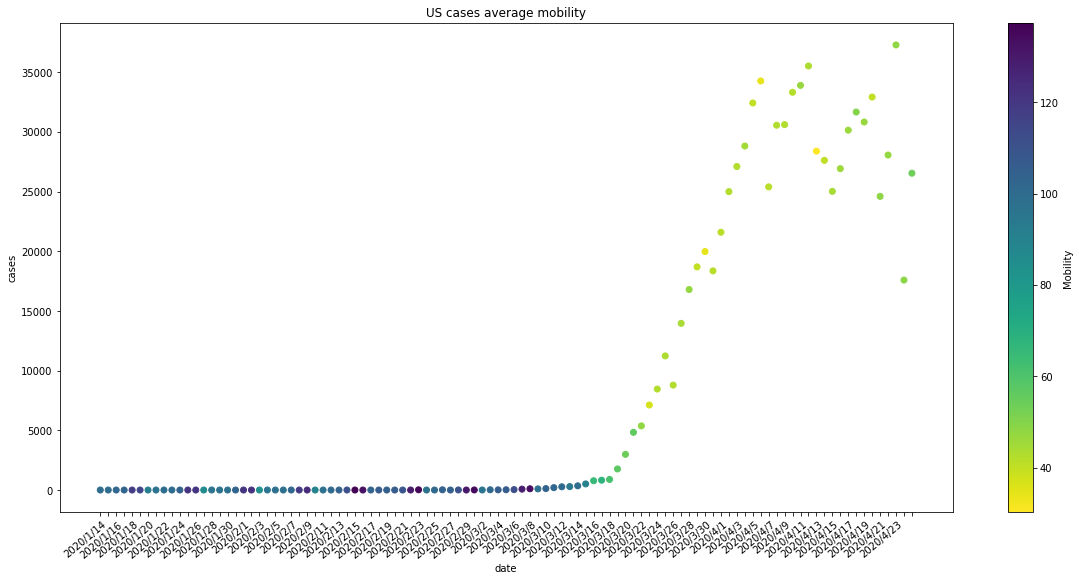

In [24]:
# visualizing mobility and number of cases
# average_mobility
average_mobility = [(x + y + z) / 3 for x, y, z in zip(driving, transit, walking)]

dates = df_mobUS.columns[1:]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility')

plt.scatter(dates, daily_cases, c=average_mobility, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

# df_cases_and_mobilityUS 

### Mobility and Deaths analysis

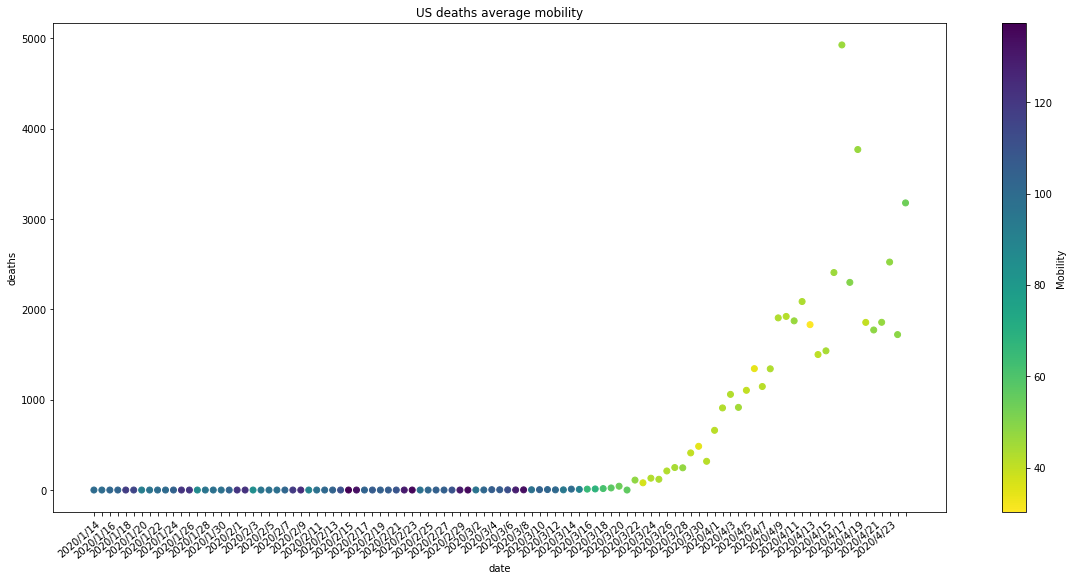

In [25]:
# visualizing mobility and number of deaths
# average mobility
daily_deaths = df_daily_deaths['Daily confirmed deaths (deaths)']
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('deaths')
plt.title('US deaths average mobility')

plt.scatter(dates, daily_deaths, c=average_mobility, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

## Mobility and Cases analysis (CITIES)

In [26]:
## GET AVERAGE MOBILITY FROM 4 CITIES
## baltimore
balti = df_mobUScty.values[0:3]
balt = []
for row in balti:
    balt.append(row[2:])
# print(balt)
average_mobility_balt = [(x + y + z) / 3 for x, y, z in zip(balt[0], balt[1], balt[2])]
# print(average_mobility_balt)

## Boston
bosto = df_mobUScty.values[3:6]
# print(bosto)
bost = []
for row in bosto:
    bost.append(row[2:])
# print(bost)
average_mobility_bost = [(x + y + z) / 3 for x, y, z in zip(bost[0], bost[1], bost[2])]
# print(average_mobility_bost)

## LA
LAn = df_mobUScty.values[21:24]
# print(LAn)
LA = []
for row in LAn:
    LA.append(row[2:])
# print(LA)
average_mobility_LA = [(x + y + z) / 3 for x, y, z in zip(LA[0], LA[1], LA[2])]
# print(average_mobility_LA)

## NYC
NYCi = df_mobUScty.values[27:30]
# print(NYCi)
NYC = []
for row in NYCi:
    NYC.append(row[2:])
# print(NYC)
average_mobility_NYC = [(x + y + z) / 3 for x, y, z in zip(NYC[0], NYC[1], NYC[2])]
# print(average_mobility_NYC)

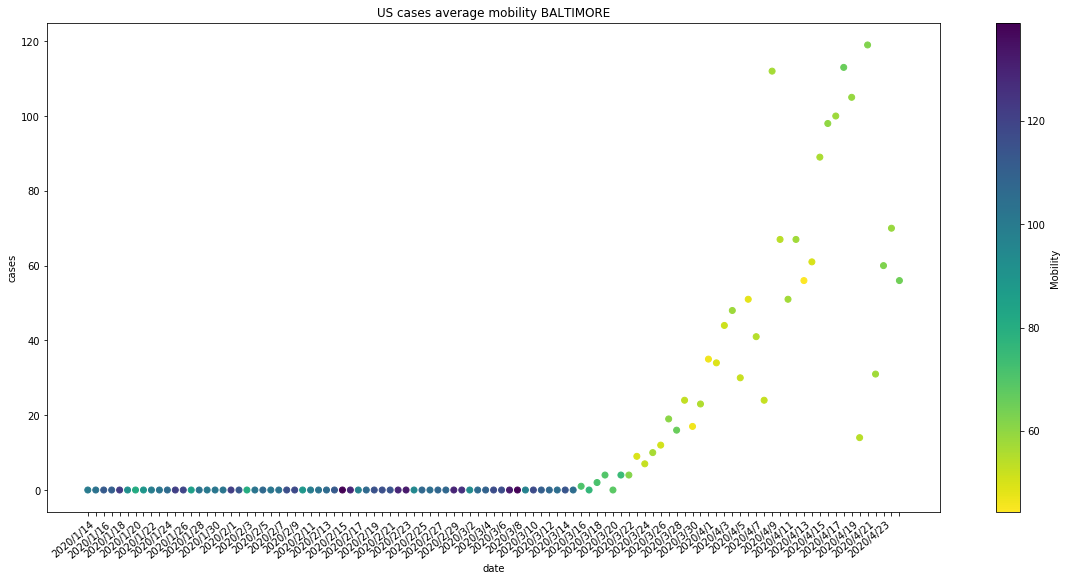

In [27]:
# BALTIMORE
# visualizing mobility and number of cases for cities
# average_mobility cities
baltimore = df_dailyCasesCities.values[0][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility BALTIMORE')

plt.scatter(dates, baltimore, c=average_mobility_balt, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()


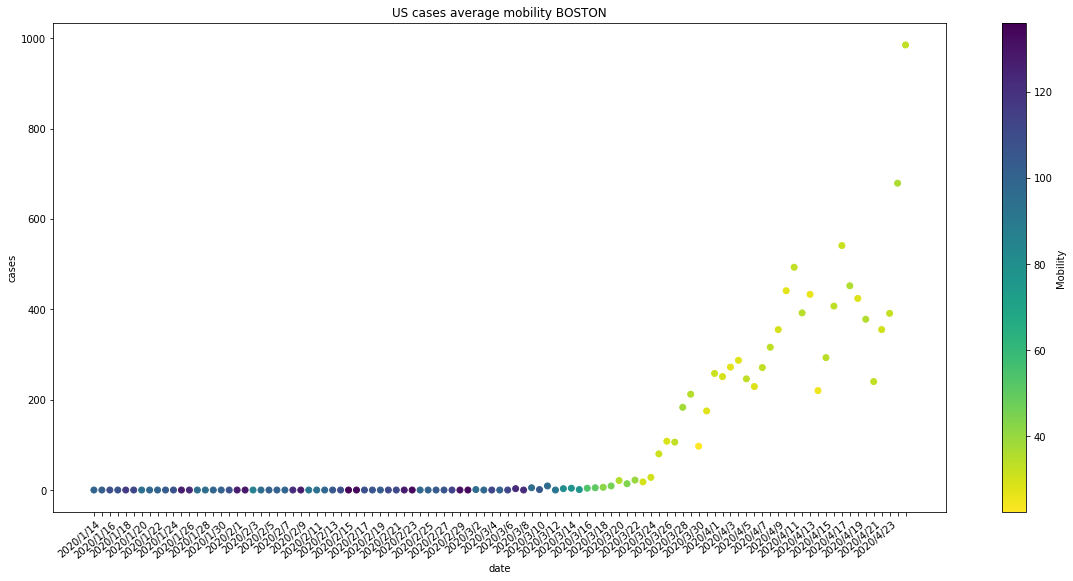

In [28]:
# BOSTON
# visualizing mobility and number of cases for cities
# average_mobility cities
boston = df_dailyCasesCities.values[1][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility BOSTON')

plt.scatter(dates, boston, c=average_mobility_bost, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()


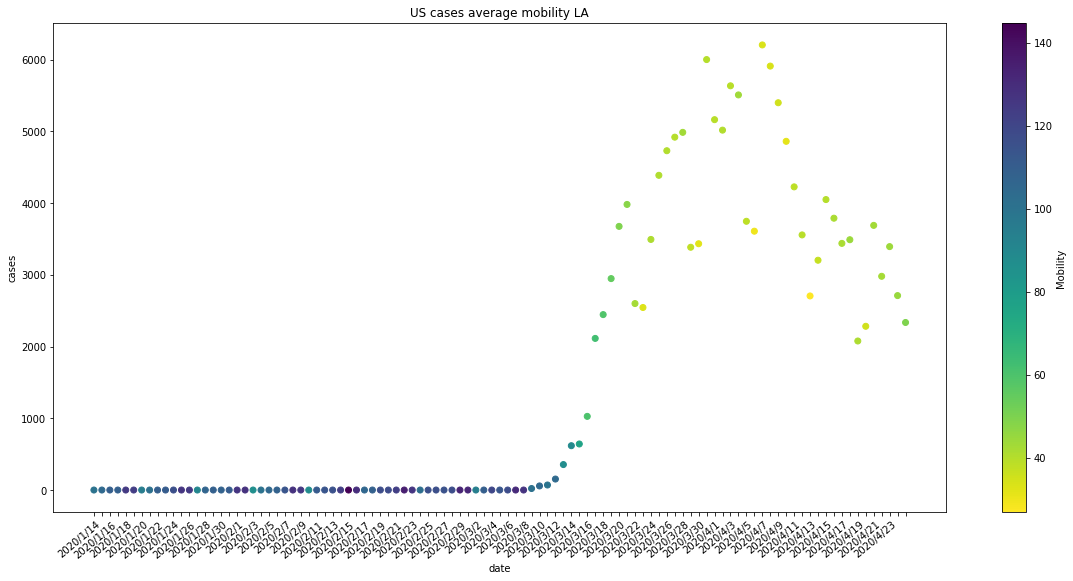

In [29]:
# LA
# visualizing mobility and number of cases for cities
# average_mobility cities
la = df_dailyCasesCities.values[2][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility LA')

plt.scatter(dates, la, c=average_mobility_LA, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

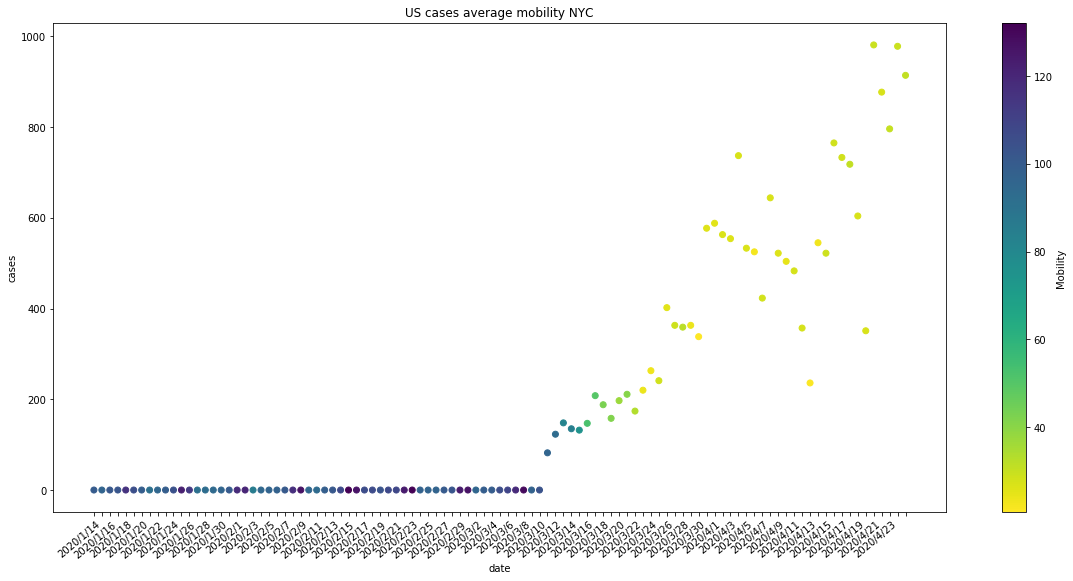

In [30]:
# NYC
# visualizing mobility and number of cases for cities
# average_mobility cities
nyc = df_dailyCasesCities.values[3][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility NYC')

plt.scatter(dates, nyc, c=average_mobility_NYC, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

## Mobility and Deaths analysis (CITIES)

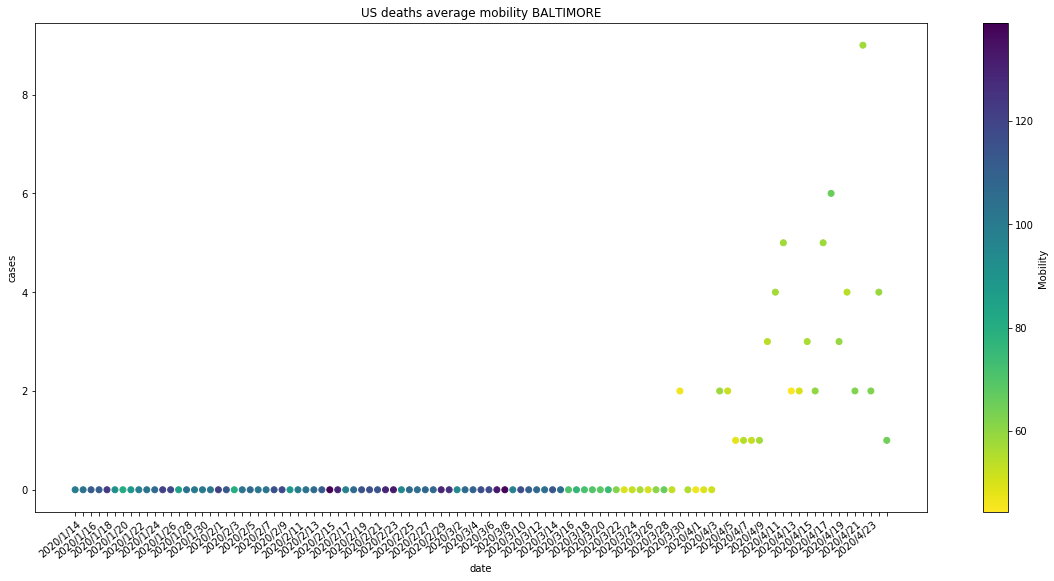

In [31]:
# BALTIMORE
# visualizing mobility and number of deaths for cities
# average_mobility cities
baltimore = df_dailyDeathsCities.values[0][1:104]
dates = list(df_dailyDeathsCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US deaths average mobility BALTIMORE')

plt.scatter(dates, baltimore, c=average_mobility_balt, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

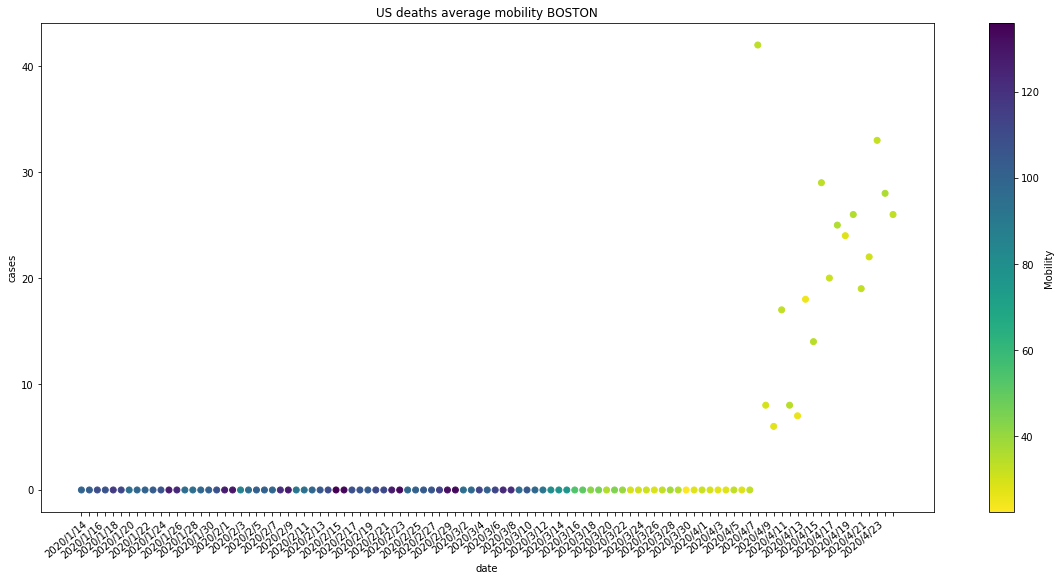

In [32]:
# BOSTON
# visualizing mobility and number of deaths for cities
# average_mobility cities
boston = df_dailyDeathsCities.values[1][1:104]
dates = list(df_dailyDeathsCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US deaths average mobility BOSTON')

plt.scatter(dates, boston, c=average_mobility_bost, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

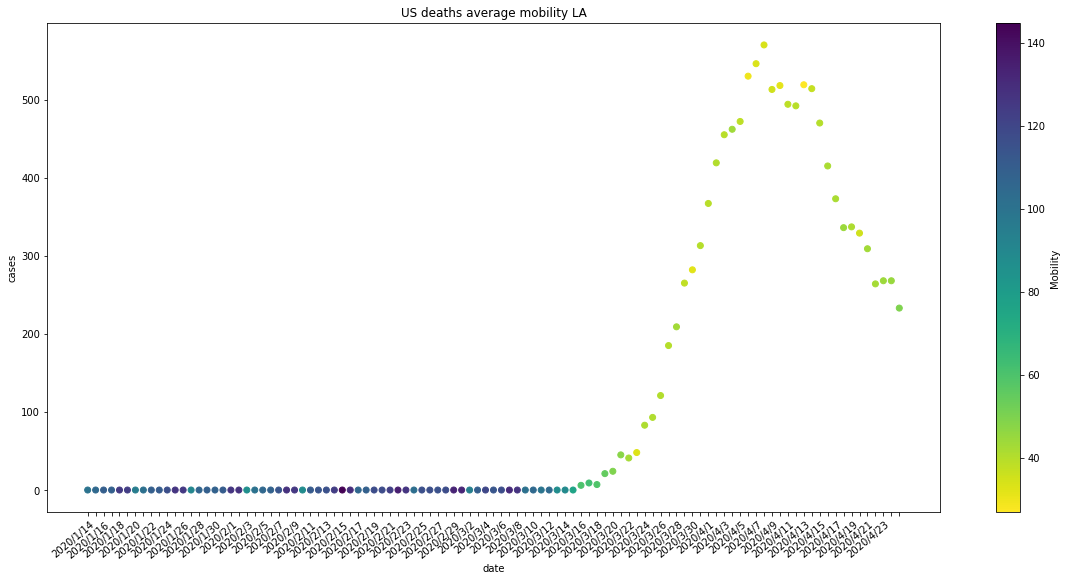

In [33]:
# LA
# visualizing mobility and number of deaths for cities
# average_mobility cities
la = df_dailyDeathsCities.values[2][1:104]
dates = list(df_dailyDeathsCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US deaths average mobility LA')

plt.scatter(dates, la, c=average_mobility_LA, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

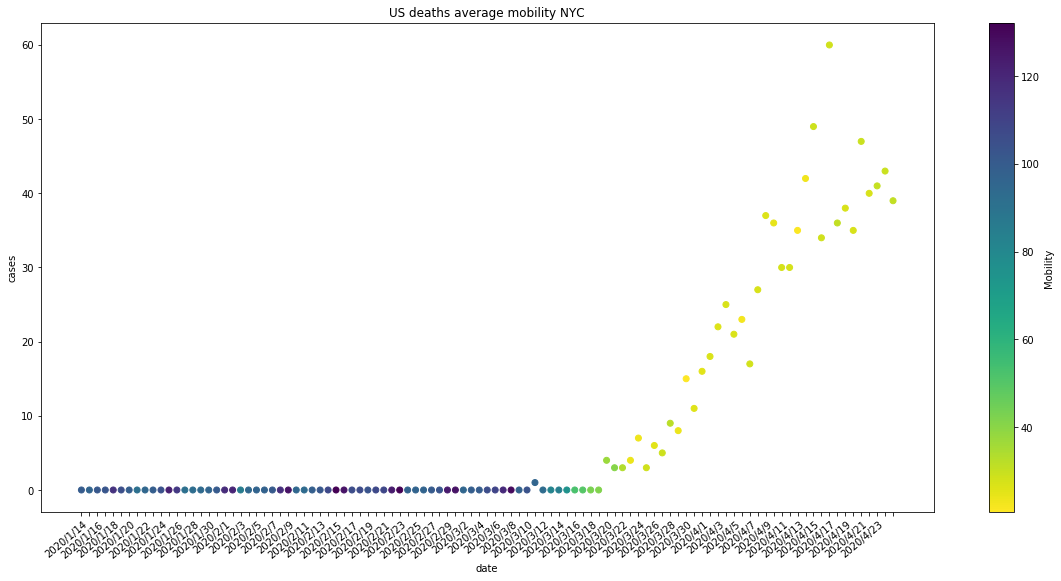

In [34]:
# NYC
# visualizing mobility and number of deaths for cities
# average_mobility cities
nyc = df_dailyDeathsCities.values[3][1:104]
dates = list(df_dailyDeathsCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US deaths average mobility NYC')

plt.scatter(dates, nyc, c=average_mobility_NYC, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

In [45]:
## SHOWING BUBBLE PLOTS
# # NYC
# # visualizing mobility and number of deaths for cities
# # average_mobility cities
# nyc = df_dailyDeathsCities.values[3][1:104]
# dates = list(df_dailyDeathsCities.columns)[1:104]
# # print(dates)

# fig, ax = plt.subplots(figsize=(20, 10))
# ax.set_xticks(np.arange(len(dates))) 
# ax.set_xticklabels(dates)
# plt.xlabel('date')
# plt.ylabel('cases')
# plt.title('US deaths average mobility NYC')

# plt.scatter(dates, nyc, s=average_mobility_NYC*1000, alpha=.5)


# plt.gcf().autofmt_xdate()
# plt.xticks(rotation=40) 
# spacing = 2
# for label in ax.xaxis.get_ticklabels()[::spacing]:
#     label.set_visible(False)
    
# # plt.colorbar().set_label('Mobility')
# plt.show()

In [64]:
# # NYC
# # visualizing mobility and number of deaths for cities
# # average_mobility cities
# nyc = df_dailyDeathsCities.values[3][1:104]
# dates = list(df_dailyDeathsCities.columns)[1:104]
# # print(dates)

# # fig, ax = plt.subplots(figsize=(10, 10))
# # ax.set_xticks(np.arange(len(nyc))) 
# # ax.set_xticklabels(nyc)
# # plt.xlabel('nyc')
# # plt.ylabel('deaths')
# plt.title('US deaths average mobility NYC')

# plt.scatter(average_mobility_NYC, nyc)


# # plt.gcf().autofmt_xdate()
# plt.xticks(rotation=40) 
# spacing = 2
# for label in ax.xaxis.get_ticklabels()[::spacing]:
#     label.set_visible(False)
    
# # plt.colorbar().set_label('Mobility')
# plt.show()